In [3]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import projections
import matplotlib.pyplot as plt

originalfileloc = r'C:\Users\lenovo\Desktop\panda_datacleaning\bank_churners\BankChurners.csv'
df = pd.read_csv(originalfileloc)
df = df.copy()


In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
modifiedfileloc = r'C:\Users\lenovo\Desktop\panda_datacleaning\bank_churners\cleaned_BankChurners.csv'
df = pd.read_csv(modifiedfileloc)
df = df.copy()

In [12]:
#df.describe()
print(df.head(1))

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  

[1 rows x 21 columns]


In [22]:
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [5]:
print('is there any duplicate rows?',df.duplicated().sum(), '\n\n')
print('null count total',df.isnull().sum().sum(),'\n\n')
print('empty cells total', df.isna().sum().sum())

is there any duplicate rows? 0 


null count total 0 


empty cells total 0


In [16]:
Customer_Age_avg = df['Customer_Age'].mean()
Total_Revolving_Bal_avg = df['Total_Revolving_Bal'].mean()
number = df[(df['Customer_Age'] > Customer_Age_avg) & (df['Total_Revolving_Bal'] > Total_Revolving_Bal_avg)].count(axis=0)[0]
rowcount = df.shape[0]
print( 
    'amount of customers who are above average age and have higher revolving balances on average is  ',
    number
    )
print('and the ratio is ', number/rowcount)
print('and the ratio of those below average is ', 1-number/rowcount, 'and their count ', rowcount-number)

amount of customers who are above average age and have higher revolving balances on average is   2760
and the ratio is  0.2725387577762417
and the ratio of those below average is  0.7274612422237583 and their count  7367


to do:
add a bit of visulaization and a couple more insights into the data
plot something with that baysien col

([<matplotlib.patches.Wedge at 0x229a20f04f0>,
 [Text(0.7208390390215821, 0.8308977553360235, 'customer count above avg_age'),
  Text(-0.7208391168158412, -0.8308976878461981, 'customer count less avg_age')],
 [Text(0.3931849303754084, 0.45321695745601276, '27%'),
  Text(-0.3931849728086407, -0.4532169206433807, '73%')])

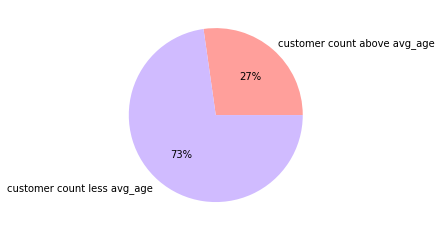

In [30]:
fig1, ax1 = plt.subplots()
colors = sns.color_palette('pastel')[3:5]
data = [number, rowcount-number]
labels = ['customer count above avg_age','customer count less avg_age']
ax1.axis('equal')
ax1.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

In [53]:
print(df[['Customer_Age', 'Total_Revolving_Bal']][0:4])
print(df['Total_Revolving_Bal'].max())

   Customer_Age  Total_Revolving_Bal
0            45                  777
1            49                  864
2            51                    0
3            40                 2517
2517


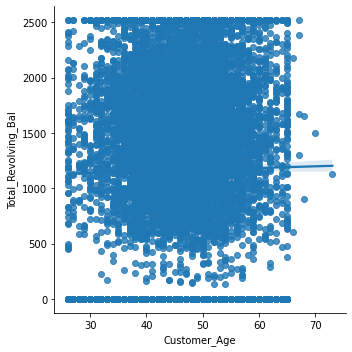

In [4]:
sns.lmplot(data=df[['Customer_Age', 'Total_Revolving_Bal']][0:], x= 'Customer_Age', y ='Total_Revolving_Bal')

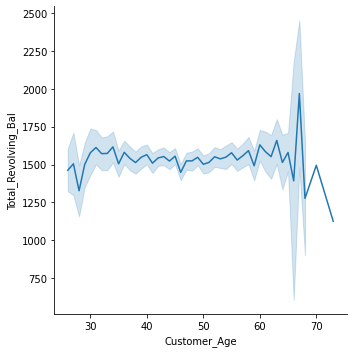

In [18]:
sns.relplot(data=df[['Customer_Age', 'Total_Revolving_Bal']][0:], x= 'Customer_Age', y ='Total_Revolving_Bal',kind="line")

<AxesSubplot:xlabel='Customer_Age', ylabel='Total_Revolving_Bal'>

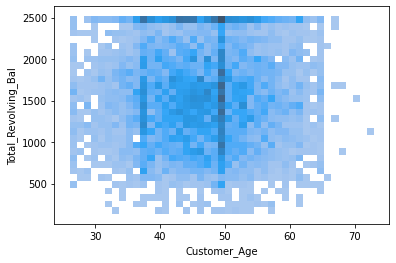

In [19]:
sns.histplot(data=df[['Customer_Age', 'Total_Revolving_Bal']][0:], x= 'Customer_Age', y ='Total_Revolving_Bal')

In [64]:
z = df['Avg_Utilization_Ratio']
z.shape
#z.values.reshape(10127,1)

(10127,)

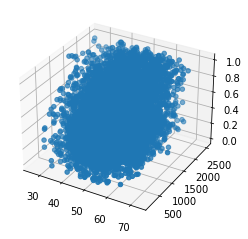

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = df['Customer_Age'][0:]
y = df['Total_Revolving_Bal'][0:]
z = df['Avg_Utilization_Ratio'][0:]
ax.scatter3D(x, y, z)

draw 3d histogram !

ImportError: Could not import backend for traitsui.  Make sure you
        have a suitable UI toolkit like PyQt/PySide or wxPython
        installed.
from mayavi import mlab
s = mlab.mesh(x, y, V)
mlab.show()

In [15]:
df_mx = df[:][['Customer_Age','Total_Revolving_Bal','Months_on_book','Credit_Limit', 
                'Total_Trans_Amt','Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1',
                'Avg_Utilization_Ratio']]
df_mx = df_mx.corr()[['Customer_Age','Total_Revolving_Bal']]
            
#df_mx = df_mx[3:]
df_mx

,Customer_Age,Total_Revolving_Bal
Customer_Age,1.000000,0.014780
Total_Revolving_Bal,0.014780,1.000000
Months_on_book,0.788912,0.008623
Credit_Limit,0.002476,0.042493
Total_Trans_Amt,-0.046446,0.064370
Total_Amt_Chng_Q4_Q1,-0.062042,0.058174
Total_Trans_Ct,-0.067097,0.056060
Total_Ct_Chng_Q4_Q1,-0.012143,0.089861
Avg_Utilization_Ratio,0.007114,0.624022


<AxesSubplot:>

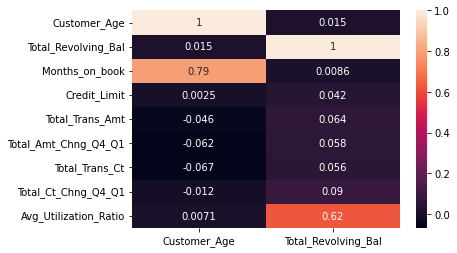

In [16]:
sns.heatmap(df_mx, annot=True, cmap='rocket')

ValueError: 'blue' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [ ]:
df.to_csv(r'C:\Users\lenovo\Desktop\panda_datacleaning\bank_churners\cleaned_BankChurners.csv')